In [15]:
from ultralytics import YOLO

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [17]:
image_path = '../../data/roboflow/Basketball Players.v22-raw-images-scoreboardclassesonly-nonulls.yolov8/test/images/youtube-0_jpg.rf.0c58f13a69f202f67cb5eef3c9360c92.jpg'

In [18]:
model = YOLO("yolov8n.pt")
results = model(image_path)
results


image 1/1 /Users/aathreyakadambi/Documents/Research/Personal/[PERSONAL:SURYA] LukaVision/code/src/eda/../../data/roboflow/Basketball Players.v22-raw-images-scoreboardclassesonly-nonulls.yolov8/test/images/youtube-0_jpg.rf.0c58f13a69f202f67cb5eef3c9360c92.jpg: 384x640 15 persons, 112.9ms
Speed: 2.6ms preprocess, 112.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [19]:
result = results[0]

In [20]:
len(result.boxes)

15

In [21]:
box = result.boxes[0]

In [22]:
print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)

Object type: tensor([0.])
Coordinates: tensor([[ 956.6670,  402.3474, 1108.3457,  680.1383]])
Probability: tensor([0.7608])


In [23]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: person
Coordinates: [957, 402, 1108, 680]
Probability: 0.76
---
Object type: person
Coordinates: [400, 409, 588, 726]
Probability: 0.75
---
Object type: person
Coordinates: [1558, 351, 1786, 746]
Probability: 0.7
---
Object type: person
Coordinates: [771, 514, 994, 855]
Probability: 0.67
---
Object type: person
Coordinates: [740, 895, 940, 1080]
Probability: 0.64
---
Object type: person
Coordinates: [0, 788, 185, 1076]
Probability: 0.59
---
Object type: person
Coordinates: [1591, 991, 1695, 1080]
Probability: 0.56
---
Object type: person
Coordinates: [931, 828, 1079, 1074]
Probability: 0.51
---
Object type: person
Coordinates: [597, 976, 692, 1080]
Probability: 0.47
---
Object type: person
Coordinates: [361, 860, 523, 1077]
Probability: 0.45
---
Object type: person
Coordinates: [721, 998, 808, 1080]
Probability: 0.45
---
Object type: person
Coordinates: [216, 623, 323, 967]
Probability: 0.44
---
Object type: person
Coordinates: [1220, 638, 1364, 880]
Probability: 0.33
---


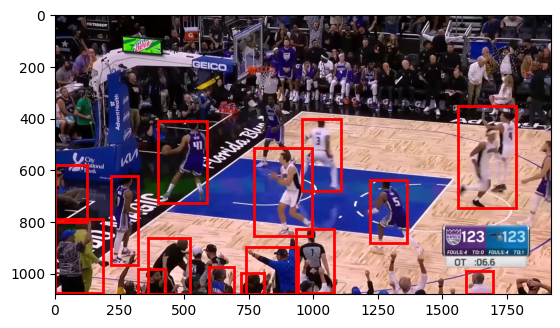

In [26]:
fig, ax = plt.subplots()
ax.imshow(plt.imread(image_path))
for box in result.boxes:
    ls = box.xyxy[0].tolist()
    rect = patches.Rectangle((ls[0], ls[1]), ls[2]-ls[0], ls[3]-ls[1], linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()